**Emotion Detection**

*Import libraries*

In [1]:
import matplotlib.pyplot as plt
from glob import glob
import cv2
import random
import os
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG, Image
import tensorflow as tf
print("Tensorflow version:", tf.__version__)




2024-09-04 09:29:38.904246: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-04 09:29:41.582868: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-04 09:29:42.339668: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-04 09:29:50.572373: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-04 09:30:14.251262: W tensorflow/compiler/tf2

Tensorflow version: 2.17.0


**Exploring Dataset**

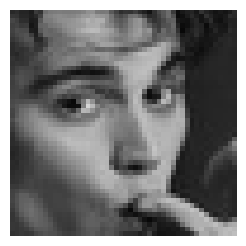

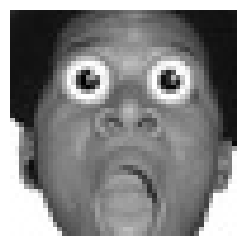

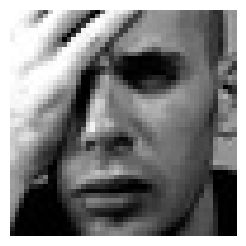

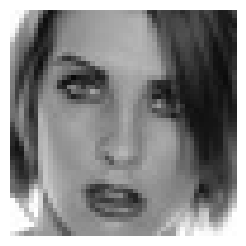

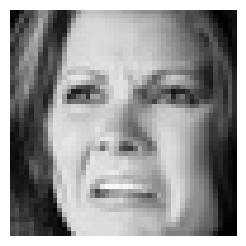

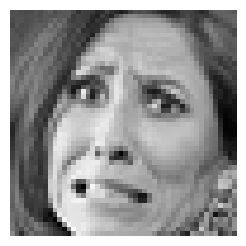

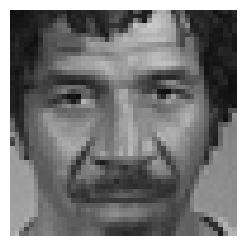

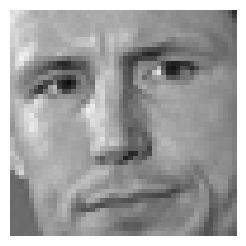

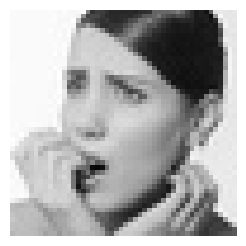

In [3]:
images = glob("train/**/**")
for i in range(9):
    image = random.choice(images)
    plt.figure(figsize= (10,10))
    plt.subplot(331+i)
    plt.imshow(cv2.imread(image));plt.axis('off')

**Preparing Data for training**

In [4]:
img_size = 48
batch_size =64
datagen_train = ImageDataGenerator()
train_generator = datagen_train.flow_from_directory("train/", target_size = (img_size, img_size),
                                                    color_mode = "grayscale",
                                                    class_mode = "categorical",
                                                    shuffle= True)

datagen_validation = ImageDataGenerator()
validation_generator = datagen_train.flow_from_directory("test/", target_size = (img_size, img_size),
                                                    color_mode = "grayscale",
                                                    class_mode = "categorical",
                                                    shuffle= True)

Found 28708 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


**Defining Model**

In [5]:
def Convolution(input_tensor, filters, kernel_size):
    x = Conv2D(filters= filters, kernel_size = kernel_size, padding= "same")(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(2,2))(x)
    x = Dropout(0.25)(x)

    return x

In [6]:
def Dense_f(input_tensor, nodes):
    x = Dense(nodes)(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.25)(x)

    return x

In [7]:
def model_fer (input_shape):
    input = Input(input_shape)
    conv_1 = Convolution(input,32,(3,3))
    conv_2 = Convolution(conv_1,64,(5,5))
    conv_3 = Convolution(conv_2,128,(3,3))
    
    flatten = Flatten()(conv_3)

    dense_1 = Dense_f(flatten, 256)

    output = Dense(7, activation = "softmax")(dense_1)
    model = Model(inputs = [input], outputs = [output])

    model.compile(loss = ['categorical_crossentropy'], optimizer = 'adam', metrics = ['accuracy'] )
    
    return model




In [8]:
model = model_fer((48,48,1))
model.summary()

I0000 00:00:1725442889.748740     805 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1725442896.703610     805 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1725442896.703693     805 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1725442896.725870     805 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1725442896.725956     805 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:0

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 48, 48, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 48, 48, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 48, 48, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,309,063 (4.99 MB)

 Trainable params: 1,308,103 (4.99 MB)

 Non-trainable params: 960 (3.75 KB)

**Initializing the model**

In [9]:
epochs = 15
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

checkpoint = ModelCheckpoint("model.weights.h5", monitor = 'val_accuracy', save_weights_only = True, mode = 'max', verbose= 1)
callbacks = [checkpoint]

**Training the model**

In [10]:
history = model.fit(
    x = train_generator,
    steps_per_epoch = steps_per_epoch,
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps = validation_steps,
    callbacks = callbacks
)

Epoch 1/15


/mnt/c/Users/user/Downloads/emotion_detection/emotion_detection/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1725442922.689486    1169 service.cc:146] XLA service 0x7fb9740090d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1725442922.689562    1169 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2024-09-04 09:42:03.502731: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-09-04 09:42:05.607569: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531]

  1/897 ━━━━━━━━━━━━━━━━━━━━ 8:09:56 33s/step - accuracy: 0.0625 - loss: 2.4137

I0000 00:00:1725442947.495068    1169 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


687/897 ━━━━━━━━━━━━━━━━━━━━ 50s 240ms/step - accuracy: 0.2878 - loss: 1.8799

2024-09-04 09:45:12.222002: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'input_add_reduce_fusion_1', 8 bytes spill stores, 8 bytes spill loads



894/897 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step - accuracy: 0.3027 - loss: 1.8357
Epoch 1: saving model to model.weights.h5
897/897 ━━━━━━━━━━━━━━━━━━━━ 296s 294ms/step - accuracy: 0.3030 - loss: 1.8350 - val_accuracy: 0.2751 - val_loss: 1.9410
Epoch 2/15
  1/897 ━━━━━━━━━━━━━━━━━━━━ 1:24 95ms/step - accuracy: 0.5312 - loss: 1.3369

2024-09-04 09:46:51.010480: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-09-04 09:46:51.010562: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
/usr/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)



Epoch 2: saving model to model.weights.h5


2024-09-04 09:46:53.359069: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-09-04 09:46:53.359161: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12206613021689678167
2024-09-04 09:46:53.359220: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 2622234066987449240


897/897 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5312 - loss: 1.3369 - val_accuracy: 0.3000 - val_loss: 1.6115
Epoch 3/15
893/897 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step - accuracy: 0.4647 - loss: 1.3929
Epoch 3: saving model to model.weights.h5
897/897 ━━━━━━━━━━━━━━━━━━━━ 238s 264ms/step - accuracy: 0.4648 - loss: 1.3927 - val_accuracy: 0.4914 - val_loss: 1.3340
Epoch 4/15
  1/897 ━━━━━━━━━━━━━━━━━━━━ 1:26 97ms/step - accuracy: 0.4688 - loss: 1.4400
Epoch 4: saving model to model.weights.h5


2024-09-04 09:50:52.331663: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-09-04 09:50:52.331816: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12206613021689678167
2024-09-04 09:50:52.331877: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 2622234066987449240


897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step - accuracy: 0.4688 - loss: 1.4400 - val_accuracy: 0.7000 - val_loss: 1.3257
Epoch 5/15
893/897 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step - accuracy: 0.5146 - loss: 1.2676
Epoch 5: saving model to model.weights.h5
897/897 ━━━━━━━━━━━━━━━━━━━━ 230s 255ms/step - accuracy: 0.5146 - loss: 1.2676 - val_accuracy: 0.4775 - val_loss: 1.3553
Epoch 6/15
  1/897 ━━━━━━━━━━━━━━━━━━━━ 1:26 97ms/step - accuracy: 0.6562 - loss: 1.0015
Epoch 6: saving model to model.weights.h5


2024-09-04 09:54:42.650762: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12206613021689678167
2024-09-04 09:54:42.650916: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 2622234066987449240


897/897 ━━━━━━━━━━━━━━━━━━━━ 1s 456us/step - accuracy: 0.6562 - loss: 1.0015 - val_accuracy: 0.6000 - val_loss: 1.0079
Epoch 7/15
893/897 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step - accuracy: 0.5417 - loss: 1.2097
Epoch 7: saving model to model.weights.h5
897/897 ━━━━━━━━━━━━━━━━━━━━ 220s 244ms/step - accuracy: 0.5417 - loss: 1.2096 - val_accuracy: 0.4801 - val_loss: 1.3250
Epoch 8/15
  1/897 ━━━━━━━━━━━━━━━━━━━━ 1:26 97ms/step - accuracy: 0.5312 - loss: 1.3489
Epoch 8: saving model to model.weights.h5


2024-09-04 09:58:23.234439: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-09-04 09:58:23.234577: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12206613021689678167
2024-09-04 09:58:23.234631: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 2622234066987449240


897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - accuracy: 0.5312 - loss: 1.3489 - val_accuracy: 0.6000 - val_loss: 1.3126
Epoch 9/15
896/897 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step - accuracy: 0.5756 - loss: 1.1274
Epoch 9: saving model to model.weights.h5
897/897 ━━━━━━━━━━━━━━━━━━━━ 223s 247ms/step - accuracy: 0.5756 - loss: 1.1274 - val_accuracy: 0.5571 - val_loss: 1.1809
Epoch 10/15
  1/897 ━━━━━━━━━━━━━━━━━━━━ 1:24 95ms/step - accuracy: 0.5312 - loss: 1.2376
Epoch 10: saving model to model.weights.h5


2024-09-04 10:02:06.519558: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12206613021689678167
2024-09-04 10:02:06.519680: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 2622234066987449240


897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step - accuracy: 0.5312 - loss: 1.2376 - val_accuracy: 0.5000 - val_loss: 1.5211
Epoch 11/15
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step - accuracy: 0.5929 - loss: 1.0813
Epoch 11: saving model to model.weights.h5
897/897 ━━━━━━━━━━━━━━━━━━━━ 226s 250ms/step - accuracy: 0.5929 - loss: 1.0813 - val_accuracy: 0.5336 - val_loss: 1.2415
Epoch 12/15
  1/897 ━━━━━━━━━━━━━━━━━━━━ 1:24 95ms/step - accuracy: 0.5625 - loss: 1.0724
Epoch 12: saving model to model.weights.h5


2024-09-04 10:05:52.800042: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12206613021689678167
2024-09-04 10:05:52.800184: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 2622234066987449240


897/897 ━━━━━━━━━━━━━━━━━━━━ 1s 462us/step - accuracy: 0.5625 - loss: 1.0724 - val_accuracy: 0.6000 - val_loss: 0.7655
Epoch 13/15
896/897 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step - accuracy: 0.6151 - loss: 1.0352
Epoch 13: saving model to model.weights.h5
897/897 ━━━━━━━━━━━━━━━━━━━━ 234s 251ms/step - accuracy: 0.6151 - loss: 1.0352 - val_accuracy: 0.5633 - val_loss: 1.1759
Epoch 14/15
  1/897 ━━━━━━━━━━━━━━━━━━━━ 1:27 97ms/step - accuracy: 0.4688 - loss: 1.1575
Epoch 14: saving model to model.weights.h5


2024-09-04 10:09:47.392141: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12206613021689678167
2024-09-04 10:09:47.392267: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 2622234066987449240
2024-09-04 10:09:47.412940: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12206613021689678167
2024-09-04 10:09:47.413091: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 2622234066987449240


897/897 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4688 - loss: 1.1575 - val_accuracy: 0.9000 - val_loss: 0.6079
Epoch 15/15
894/897 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step - accuracy: 0.6287 - loss: 0.9853
Epoch 15: saving model to model.weights.h5
897/897 ━━━━━━━━━━━━━━━━━━━━ 227s 251ms/step - accuracy: 0.6287 - loss: 0.9854 - val_accuracy: 0.5903 - val_loss: 1.1034


**Model Evaluation**

In [11]:
model.evaluate(validation_generator)

225/225 ━━━━━━━━━━━━━━━━━━━━ 44s 197ms/step - accuracy: 0.5921 - loss: 1.0982


[1.1034207344055176, 0.5901365280151367]

**Plotting the loss**

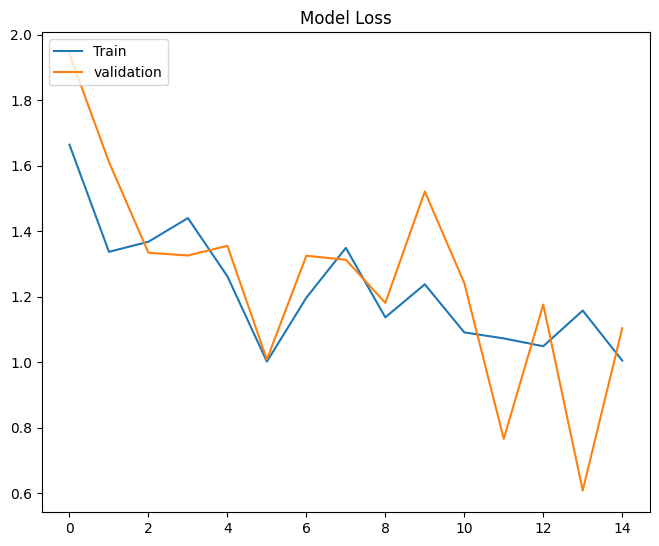

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.legend(['Train', 'validation'], loc= 'upper left')
plt.subplots_adjust(top =1.0, bottom=0.0, right= 0.95, left =0.0, hspace= 25, wspace = 0.35)

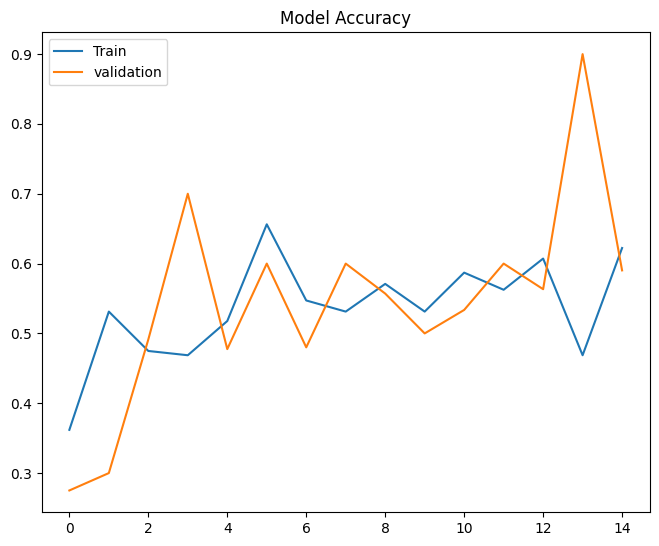

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend(['Train', 'validation'], loc= 'upper left')
plt.subplots_adjust(top =1.0, bottom=0.0, right= 0.95, left =0.0, hspace= 25, wspace = 0.35)

**Saving the Model**

In [15]:
model_json_vs = model.to_json()
with open("model_a.json","w") as json_file:
    json_file.write(model_json_vs)